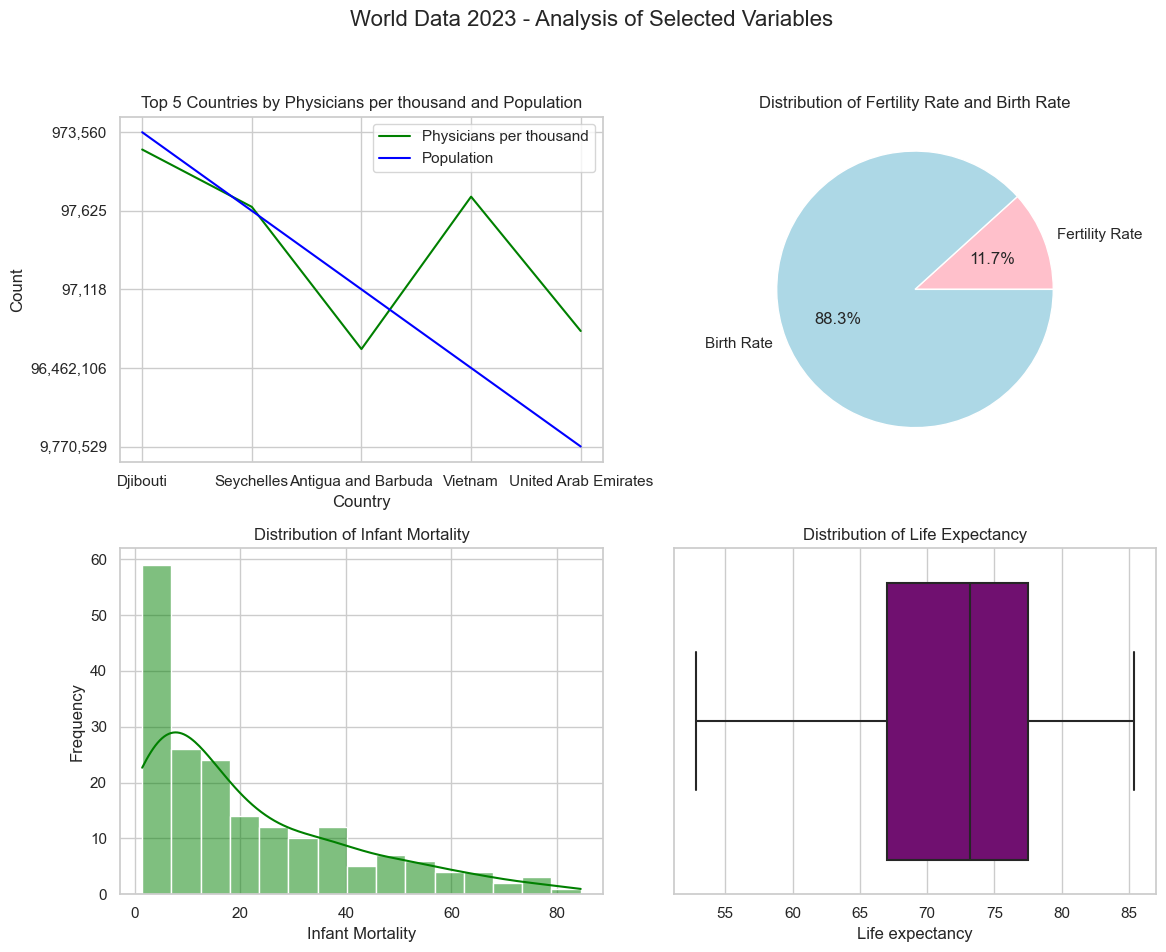

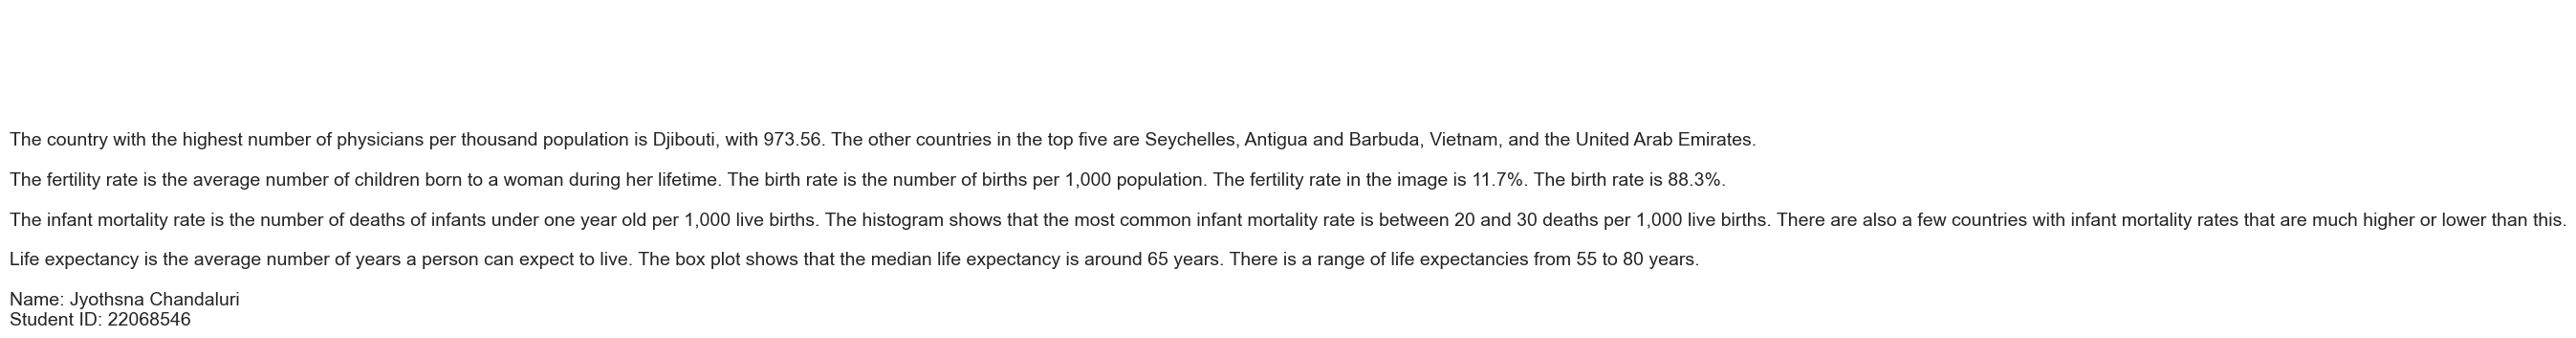

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv("C:\\Users\\User\\Downloads\\Software\\world-data-2023.csv")
sns.set(style="whitegrid")

df.describe

# Create a 2x2 grid of subplots
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 10))

# Plot 1: Line Plot for Physicians per thousand and Population (Top 5)
sns.lineplot(x='Country', y='Physicians per thousand', data=df.sort_values(by='Population', ascending=False).head(5), ax=axes[0, 0], color='green', label='Physicians per thousand')
sns.lineplot(x='Country', y='Population', data=df.sort_values(by='Population', ascending=False).head(5), ax=axes[0, 0], color='blue', label='Population')
axes[0, 0].set_title('Top 5 Countries by Physicians per thousand and Population')
axes[0, 0].set_xlabel('Country')
axes[0, 0].set_ylabel('Count')
axes[0, 0].legend()

# Plot 2: Distribution of Fertility Rate and Birth Rate as Pie Plot
fertility_sum = df['Fertility Rate'].sum()
birth_rate_sum = df['Birth Rate'].sum()
fertility_percentage = fertility_sum / (fertility_sum + birth_rate_sum) * 100
birth_rate_percentage = birth_rate_sum / (fertility_sum + birth_rate_sum) * 100
axes[0, 1].pie([fertility_percentage, birth_rate_percentage], labels=['Fertility Rate', 'Birth Rate'], autopct='%1.1f%%', colors=['pink', 'lightblue'])
axes[0, 1].set_title('Distribution of Fertility Rate and Birth Rate')

# Plot 3: Histogram for Infant Mortality
sns.histplot(df['Infant mortality'].dropna(), bins=15, kde=True, ax=axes[1, 0], color='green')
axes[1, 0].set_title('Distribution of Infant Mortality')
axes[1, 0].set_xlabel('Infant Mortality')
axes[1, 0].set_ylabel('Frequency')

# Plot 4: Distribution of Life Expectancy
sns.boxplot(x='Life expectancy', data=df, ax=axes[1, 1], color='purple')
axes[1, 1].set_title('Distribution of Life Expectancy')

# Create a new figure for the description
fig_desc = plt.figure(figsize=(15, 3))
plt.text(0, 0, "The country with the highest number of physicians per thousand population is Djibouti, with 973.56. The other countries in the top five are Seychelles, Antigua and Barbuda, Vietnam, and the United Arab Emirates.\n\n"
         "The fertility rate is the average number of children born to a woman during her lifetime. The birth rate is the number of births per 1,000 population. The fertility rate in the image is 11.7%. The birth rate is 88.3%.\n\n"
         "The infant mortality rate is the number of deaths of infants under one year old per 1,000 live births. The histogram shows that the most common infant mortality rate is between 20 and 30 deaths per 1,000 live births. There are also a few countries with infant mortality rates that are much higher or lower than this.\n\n"
         "Life expectancy is the average number of years a person can expect to live. The box plot shows that the median life expectancy is around 65 years. There is a range of life expectancies from 55 to 80 years.\n\n"
         "Name: Jyothsna Chandaluri\n"\
         "Student ID: 22068546", 
         ha='left', va='center', fontsize=14, wrap=True)
plt.axis('off')

# Overall Figure Title
fig.suptitle('World Data 2023 - Analysis of Selected Variables', fontsize=16)
# Adjust layout to prevent overlap of titles
fig.tight_layout(rect=[0, 0.03, 1, 0.95])